# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


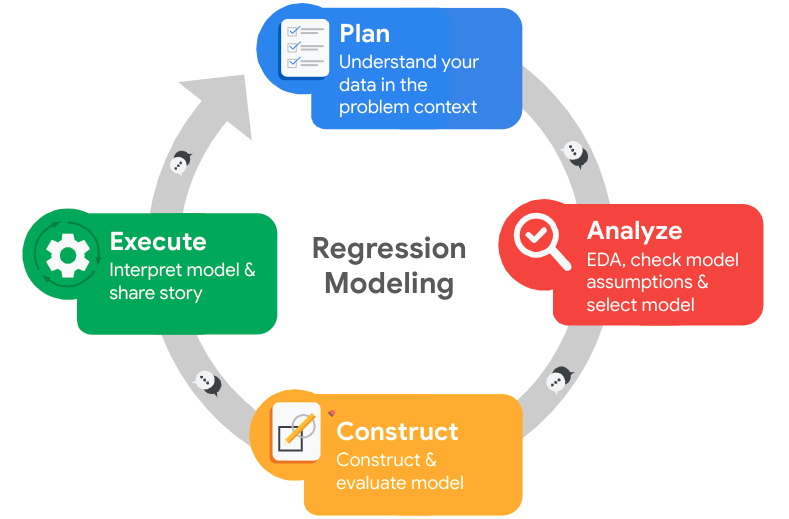

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The main audience are Salifort’s senior leadership
2. To understand why an employee would choose to leave the organization and        ways to avoid it, thereby to help Salifort create a corporate culture          that supports employee success and professional development and reduces the    financial burden of the recruitment process.

3. There is 15K data points with 10 variables:
   a. Five continous variables and 4 Categorical, one potential target               variable.
   
4. Foundation of Data science, helpful in remmebering what questions i should      consider given a dataset. 

5. work_accident is minor group of people, let's see if using that is justifiable, or remove it.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [381]:

# !pip install scikit-learn
# !pip install pandas as pd
# !pip install numpy as np
# !pip install matplotlib
# !pip install seaborn
# !pip install xgboost
# !pip install statsmodels

In [382]:
# Import packages
### YOUR CODE HERE ###

#core libraries
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


#preprocessing
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay, roc_curve

import statsmodels

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [383]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [384]:
df0.shape

(14999, 10)

In [385]:
# Gather basic information about the data
### YOUR CODE HERE ###
print(f"Total rows: {df0.shape[0]} and columns: {df0.shape[1]}")
df0.info()

Total rows: 14999 and columns: 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [386]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [387]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [388]:
# Rename columns as needed
### YOUR CODE HERE ###
rename = {'satisfaction_level':'satisfaction','last_evaluation': 'recent_evaluation','number_project': 'project_contribution', 'average_montly_hours': 'monthly_hours_avg', 'time_spend_company' :'tenure_duration', 'Work_accident': 'work_accident', 'Department': 'department', 'left': 'turnover'} 

df0 = df0.rename(columns=rename)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'recent_evaluation', 'project_contribution',
       'monthly_hours_avg', 'tenure_duration', 'work_accident', 'turnover',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [389]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction             0
recent_evaluation        0
project_contribution     0
monthly_hours_avg        0
tenure_duration          0
work_accident            0
turnover                 0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [390]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [391]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
mask = df0.duplicated()
df0[mask].head()

satisfaction  recent_evaluation  project_contribution  \
396           0.46               0.57                     2   
866           0.41               0.46                     2   
1317          0.37               0.51                     2   
1368          0.41               0.52                     2   
1461          0.42               0.53                     2   

      monthly_hours_avg  tenure_duration  work_accident  turnover  \
396                 139                3              0         1   
866                 128                3              0         1   
1317                127                3              0         1   
1368                132                3              0         1   
1461                142                3              0         1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

In [392]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0 = df0.drop_duplicates(ignore_index=False)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print(f"Total rows: {df0.shape[0]} and columns: {df0.shape[1]}")
df0.head()

Total rows: 11991 and columns: 10


satisfaction  recent_evaluation  project_contribution  monthly_hours_avg  \
0          0.38               0.53                     2                157   
1          0.80               0.86                     5                262   
2          0.11               0.88                     7                272   
3          0.72               0.87                     5                223   
4          0.37               0.52                     2                159   

   tenure_duration  work_accident  turnover  promotion_last_5years department  \
0                3              0         1                      0      sales   
1                6              0         1                      0      sales   
2                4              0         1                      0      sales   
3                5              0         1                      0      sales   
4                3              0         1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Check outliers

Check for outliers in the data.

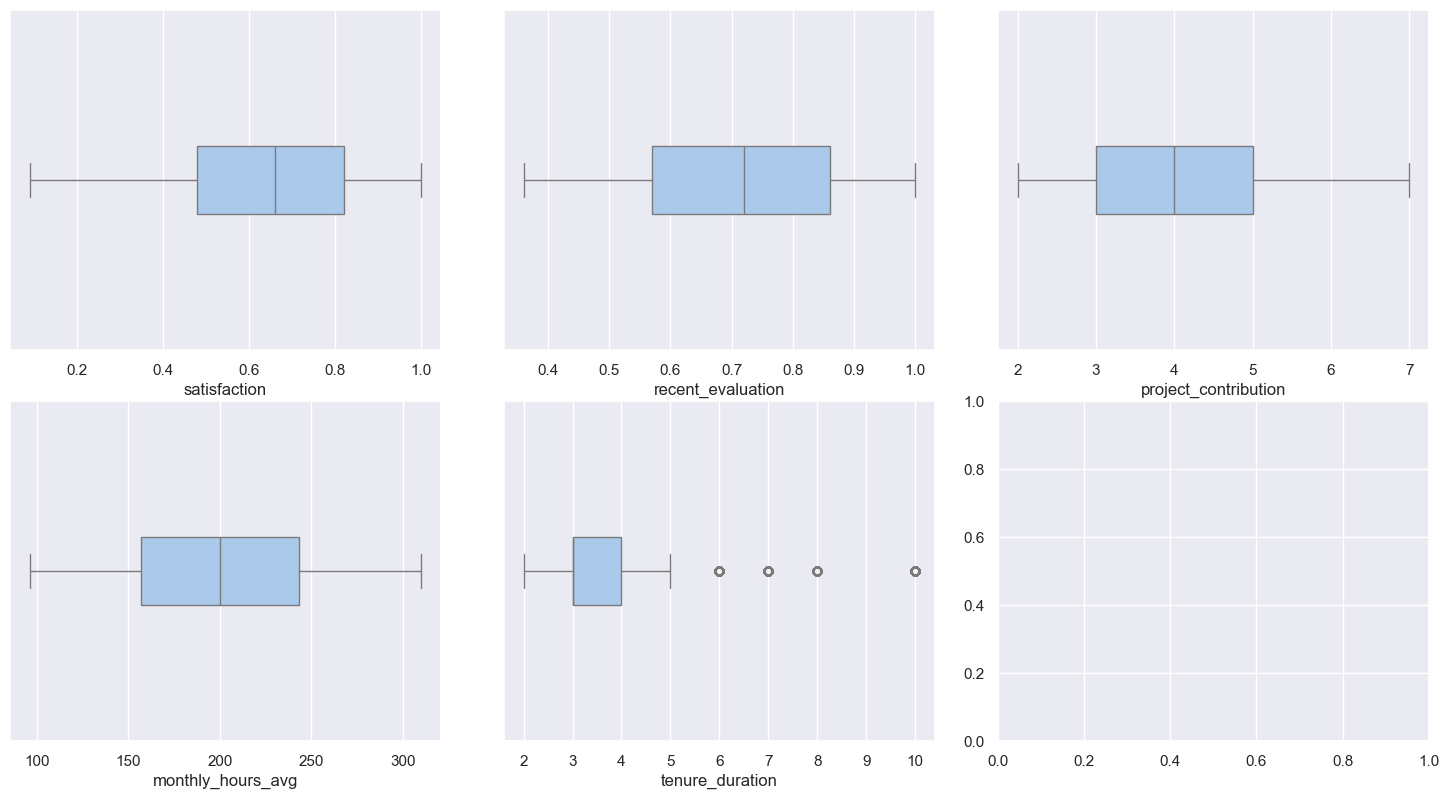

In [393]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
li = ['satisfaction', 'recent_evaluation', 'project_contribution',
       'monthly_hours_avg', 'tenure_duration']

figure, axes = plt.subplots(2, 3, figsize=(15, 8))
figure.tight_layout()

sns.boxplot(data=df0, x=li[0], width=0.2, ax=axes[0,0])
sns.boxplot(data=df0, x=li[1], width=0.2, ax=axes[0,1])
sns.boxplot(data=df0, x=li[2], width=0.2, ax=axes[0,2])
sns.boxplot(data=df0, x=li[3], width=0.2, ax=axes[1,0])
sns.boxplot(data=df0, x=li[4], width=0.2, ax=axes[1,1])

plt.show()

In [394]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
print('tenure_duration')

q1 = df0['tenure_duration'].quantile(0.25)
print(f" Quartile 1: {q1}")
q3 = df0['tenure_duration'].quantile(0.75)
print(f" Quartile 1: {q3}")
iqr = q3 - q1
print(f" Interquartile: {iqr}")
lower = q1 - (1.5*iqr)
upper = q3 + (1.5*iqr)



df0[df0['tenure_duration'] > upper].count()['tenure_duration']

tenure_duration
 Quartile 1: 3.0
 Quartile 1: 4.0
 Interquartile: 1.0


824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Observations: 
    
    a. Departments with a higher number of employees show a high level of employee turnover, e.g.,            support, sales, technical. \
    b. Evaluation rating increases as the number of project contributions increases. \
    c. Satisfaction level also shows a similar increase as project contribution increases and tends to        decrease after 5 projects. \
    d. Employees tend to leave across various evaluation ratings, with huge volumes in low rating and        high rating. \
    e. Employees tend to leave across various satisfaction ratings. 
    f. There is no one correlated variable; there are multiple factors that create the phenomenon. 
2. Most of the variables are nearly symetrical, while the total_workyears median is considrably < than the mean, suggesting it's right-skewed. 

3. Changed names to make them all follow the same convention.

4. For Ethical Considerations: 
   [Link](https://towardsdatascience.com/ethical-considerations-in-machine-learning-projects-e17cb283e072#:~:text=Fairness%20in%20machine%20learning%20refers,as%20healthcare%20and%20criminal%20justice.)

5. Working on it, Workhours

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [395]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(f"Total people left: {len(df0[df0['turnover'] == 1])}")
print(f"Total people Stayed: {len(df0[df0['turnover'] == 0])}")

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(f"Percentage of people left: {round(len(df0[df0['turnover'] == 1])/len(df0['turnover'])*100,3)}")
print(f"Percentage of people Stayed: {round(len(df0[df0['turnover'] == 0])/len(df0['turnover'])*100,3)}")
print("\n The percentage is just above 10%; we can proceed without sampling to keep the distribution intact.")

Total people left: 1991
Total people Stayed: 10000
Percentage of people left: 16.604
Percentage of people Stayed: 83.396

 The percentage is just above 10%; we can proceed without sampling to keep the distribution intact.


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [396]:
df0.head(1)

satisfaction  recent_evaluation  project_contribution  monthly_hours_avg  \
0          0.38               0.53                     2                157   

   tenure_duration  work_accident  turnover  promotion_last_5years department  \
0                3              0         1                      0      sales   

  salary  
0    low

Text(0.96, 2400, 'Left')

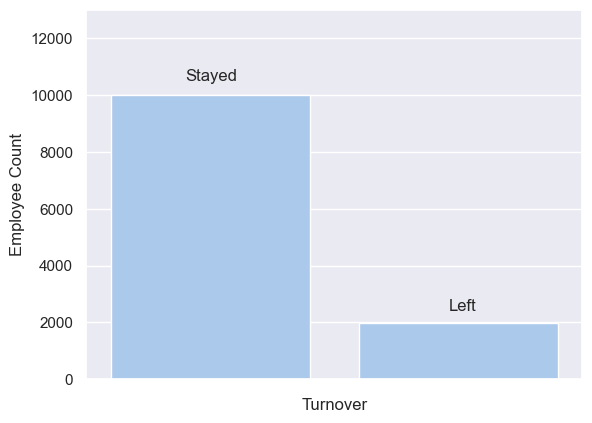

In [397]:
data = df0.groupby(['turnover'])['satisfaction'].count().reset_index().rename(columns={'satisfaction': 'Employee Count'})
data['turnover'] = data['turnover'].apply(lambda x: 'Left' if x == 1 else 'Stayed')
ax = sns.barplot(data=data, x='turnover', y='Employee Count')
ax.set(xticklabels=[], xlabel='Turnover')
ax.set_ylim(top=13000)
plt.text(x=-0.1, y=10500, s='Stayed')
plt.text(x=0.96, y=2400, s='Left')

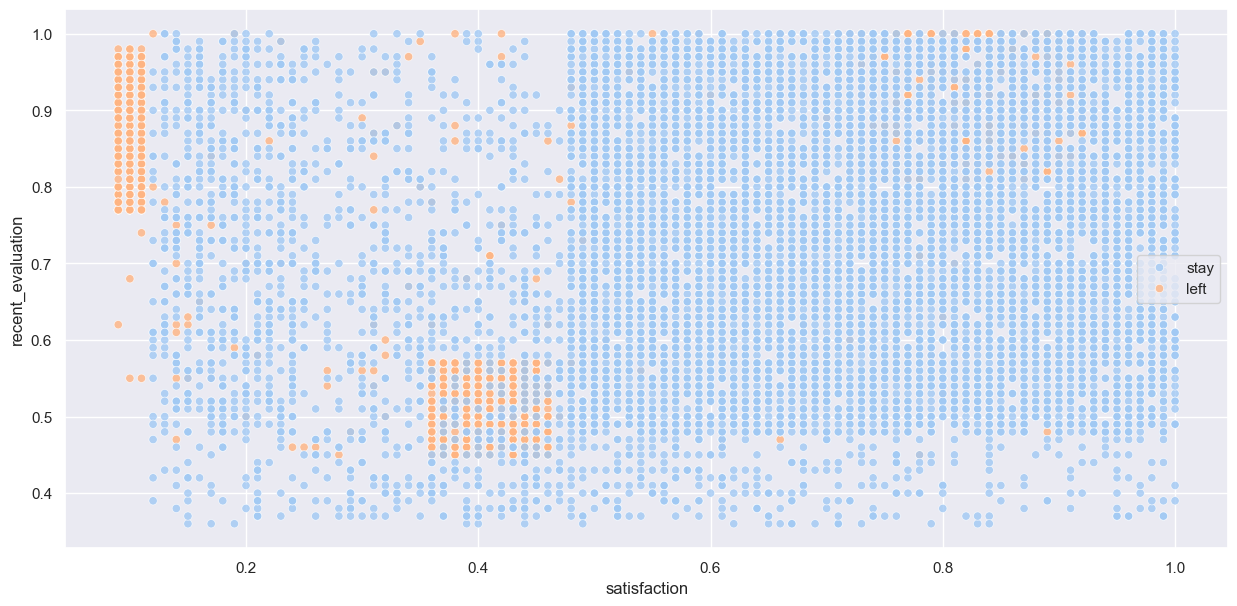

In [398]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot(data = df0, x='satisfaction', y='recent_evaluation', hue='turnover', alpha=0.8)

legend = plt.legend(loc= 'right')
legend.get_texts()[0].set_text("stay")
legend.get_texts()[1].set_text("left")


There are three groups who predominatly left the jobs:

    1. Employee who got high evaluation, but have  low satisfaction rating.
    2. Employee who have both low evaluation and low satisfaction raitng.
    3. Employee who have high satisfaction rating and high evaluation raitng.

This suggests that high rating on satisfaction or evaluations doesn't mean employee is going to stay.\
We will decode one by one.

Text(287, 2.5, ' 287 hours')

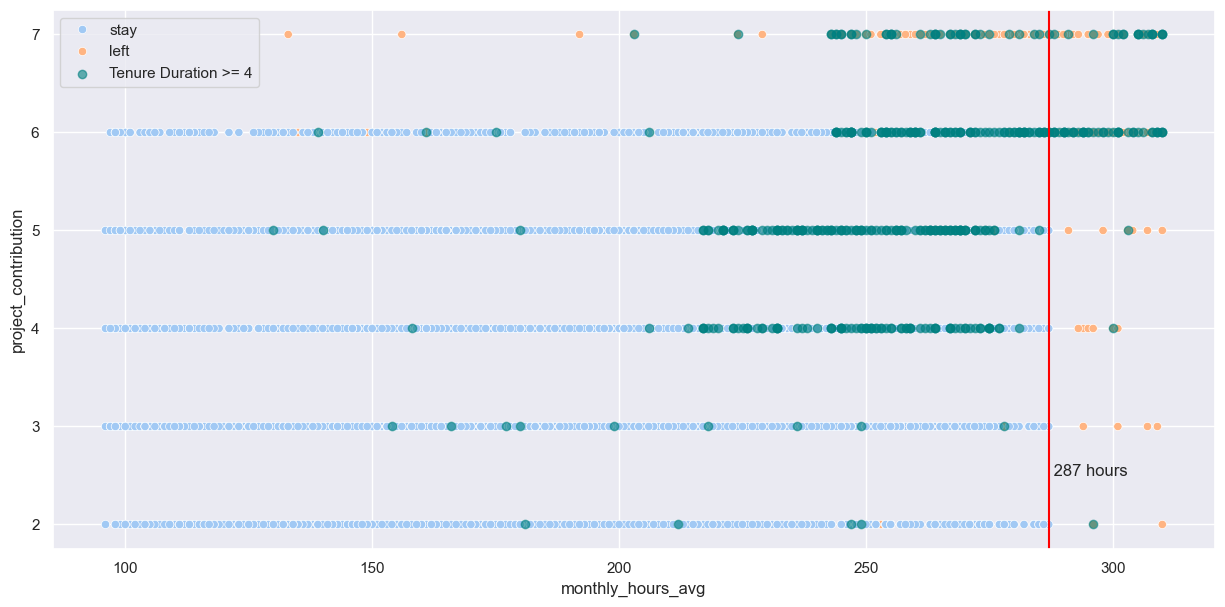

In [399]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df0, x='monthly_hours_avg', y='project_contribution', hue='turnover')

# Hours past people tend to leave the job.
plt.axvline(x=287, color = 'red')
plt.scatter(x='monthly_hours_avg', y='project_contribution', data = df0[(df0['tenure_duration'] >= 4) & (df0['turnover'] == 1) & (df0['salary'] == 'medium')], color='teal', alpha=0.6)

legend = plt.legend()
legend.get_texts()[0].set_text("stay")
legend.get_texts()[1].set_text("left")
legend.get_texts()[2].set_text("Tenure Duration >= 4")

x = 287
plt.text(x, 2.5, s=' 287 hours')

Employees who work more than 287 hours a month leave the job and onces who contribute to 7 projects leave across all hours.
Also Employees with tenure 4 or more, tend to leave the job if 4 or more projects where given

In [400]:
print(f"Minimum work hours per week: {df0['monthly_hours_avg'].min()/4}")
print(f"Minimum work hours per week: {df0['monthly_hours_avg'].max()/4}")

Minimum work hours per week: 24.0
Minimum work hours per week: 77.5


As Per International Labour Organisation convention, Standard work time is at 48 hours a week and 192 work hours per month i.e max 8 hours a day.

Text(246, 0.14, ' Less than 0.1 Satisfaction')

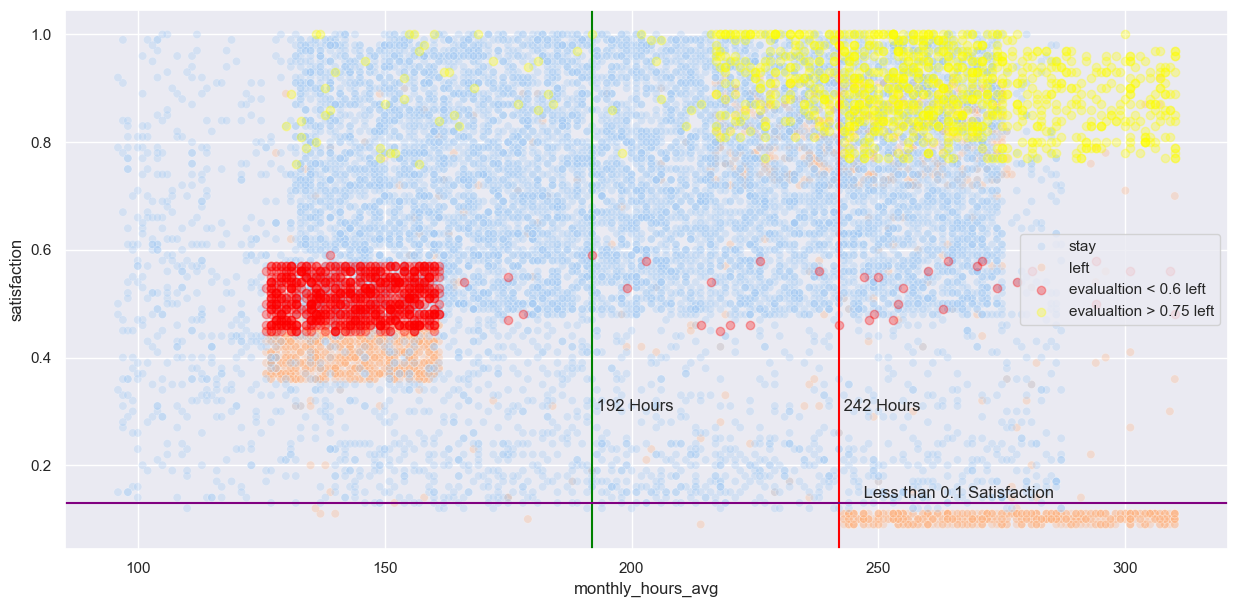

In [401]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df0, x='monthly_hours_avg', y='satisfaction', hue='turnover', alpha=0.3)


palette = sns.color_palette("viridis", 2)
plt.scatter(x='monthly_hours_avg', y='recent_evaluation', color="red", data=df0[(df0['recent_evaluation'] < 0.6) & (df0['turnover'] == 1)], alpha=0.3)
plt.scatter(x='monthly_hours_avg', y='recent_evaluation', color="yellow", data=df0[(df0['recent_evaluation'] > 0.75) & (df0['turnover'] == 1)], alpha=0.3)


legend = plt.legend()
legend.get_texts()[0].set_text("stay")
legend.get_texts()[1].set_text("left")
legend.get_texts()[2].set_text("evalualtion < 0.6 left")
legend.get_texts()[3].set_text("evalualtion > 0.75 left")



# Marking 192 hours per month
plt.axvline(x=192, color='green')
plt.text(192, 0.3, ' 192 Hours')

#Marking employees who leave (hours more than 242)
plt.axvline(x=242, color='red')
plt.text(242, 0.3, ' 242 Hours')

#Marking employees who leave and have less than 0.15 satisfaction.
plt.axhline(y=0.13, color='purple')
plt.text(246, 0.14, ' Less than 0.1 Satisfaction')

The red group : indicates employees with recent evaluation score below 0.6 and who left. \
The yellow group : indicates employees with recent evaluation score above 0.75 and who left. \
The green line : indicates conventional monthly work hours of 192. \
The red line   : indicates 242 hours per month on avg. \
The purple line: indicates satisfaction rating below 0.1.


1. There is a group of employees who work inside the Conventional hours and still leave, they have low satifaction rating and      low recent_evaluation rating.
2. Another group who work outside the conventional hours more than 192 hours a month, leave the job even though they have High    satisfaction and recent_evaluation rating.
3. Last group has lowest satisfaction rating below 0.15 and have worked more than 240 hours a month

Text(287, 2.5, '287 Hours')

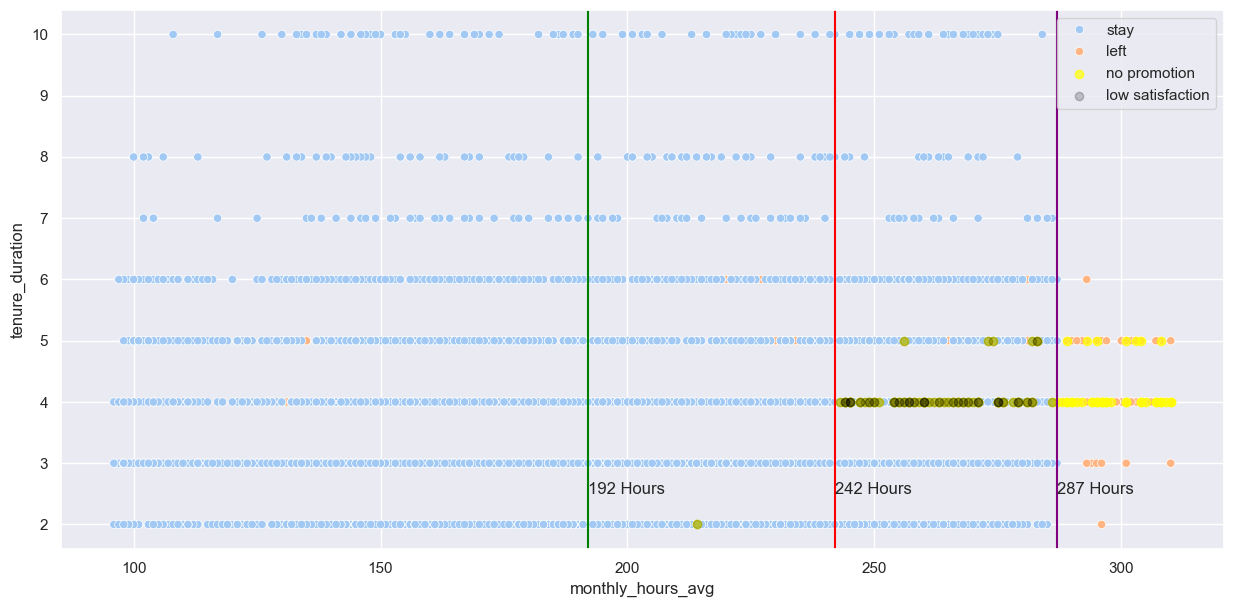

In [402]:
plt.figure(figsize=(15, 7))
sns.scatterplot(data = df0, x='monthly_hours_avg', y='tenure_duration', hue='turnover')

# Highlighting employees who have less than 0.1 satisfaction with no promotion last 5 years
plt.scatter(x='monthly_hours_avg', y='tenure_duration', data=df0[(df0['satisfaction'] < 0.1) & (df0['promotion_last_5years'] == 0) & (df0['turnover'] == 1)], alpha = 0.7, color='yellow')

# Highlighting
plt.scatter(x='monthly_hours_avg', y='tenure_duration', data=df0[(df0['satisfaction'] < 0.1) & (df0['monthly_hours_avg'] < 287) & (df0['promotion_last_5years'] == 0) & (df0['turnover'] == 1)], alpha = 0.2, color='black')

legend = plt.legend()
legend.get_texts()[0].set_text("stay")
legend.get_texts()[1].set_text("left")
legend.get_texts()[2].set_text("no promotion")
legend.get_texts()[3].set_text("low satisfaction")


# Marking 192 hours per month
x = 192
plt.axvline(x=x, color='green', label='192')
plt.text(192, 2.5, s="192 Hours")

#Marking employees who leave (hours more than 242)
x = 242
plt.axvline(x=x, color='red')
plt.text(x, 2.5, s="242 Hours")

#Marking monthly hours more than 287 after which people leave job indicative from above Project contribution Vs Monthly hours avg plot
x = 287
plt.axvline(x=x, color = 'purple')
plt.text(x, 2.5, s="287 Hours")

1. Employees who are in 4th and 5th year in the company and yet to get promotion in the last 5 years show satisfaction rating      of less than 0.1. These particular set of people are working above conventional working hours (242 hours), in their 4th and    5th year in the company with no promotion.

2. And those who worked extreme hours beyond 287 hours monthly on avg , have satisfaction rating less than 0.1 and no promotion    leave the job. which is understandable, as they working extreme hours with low satifaction still no indication of promotion.


The differentiating factor between (1,2) i.e retaining or not at this jucnture, is working hours.

Text(287, 0.4, '287 Hours')

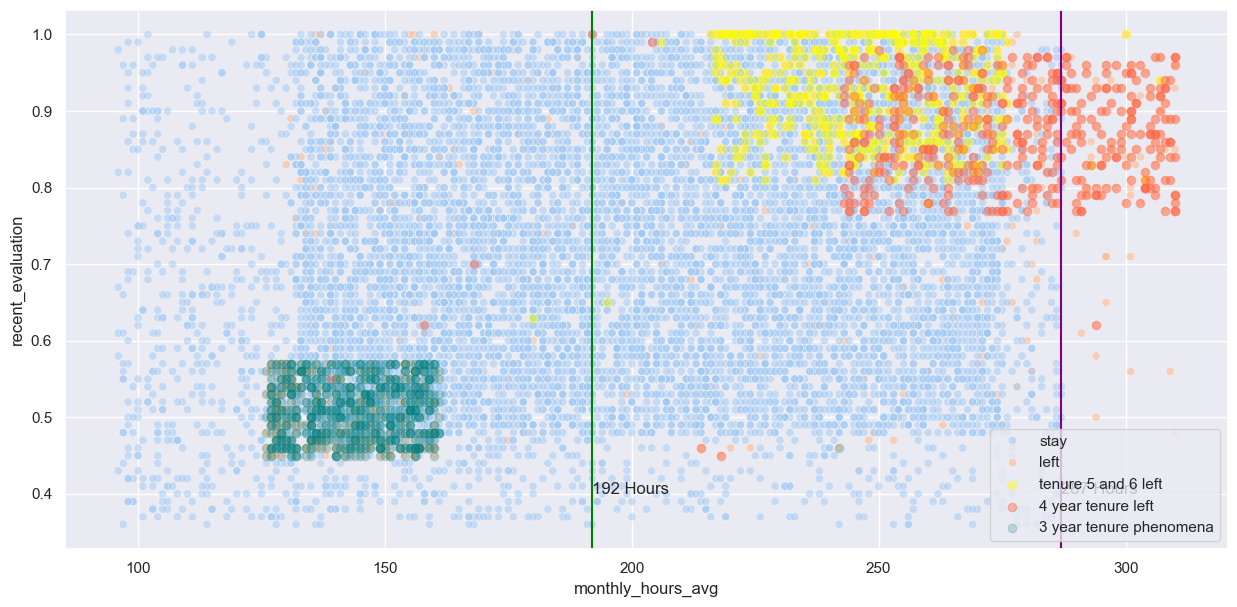

In [403]:
plt.figure(figsize=(15,7))
sns.scatterplot(data = df0, x='monthly_hours_avg', y='recent_evaluation', hue='turnover', alpha=0.5)


# 1 group 
plt.scatter(x='monthly_hours_avg', y='recent_evaluation', data = df0[(df0['tenure_duration'] >= 5) & (df0['project_contribution'] >= 4) & (df0['promotion_last_5years'] == 0) & (df0['turnover'] == 1) & (df0['satisfaction'] >= 0.7)], color='yellow', alpha=0.4)

# 2 group
plt.scatter(x='monthly_hours_avg', y='recent_evaluation', data = df0[(df0['tenure_duration'] == 4) & (df0['project_contribution'] >= 4) & (df0['promotion_last_5years'] == 0) & (df0['turnover'] == 1) & (df0['satisfaction'] <= 0.3)], color='tomato', alpha=0.4)

# 3 group *phenomena
plt.scatter(x='monthly_hours_avg', y='recent_evaluation', data = df0[(df0['tenure_duration'] == 3) & (df0['project_contribution'] == 2) & (df0['promotion_last_5years'] == 0) & (df0['turnover'] == 1) & (df0['satisfaction'] <= 0.5)], color='teal', alpha=0.2)

legend = plt.legend()
legend.get_texts()[0].set_text("stay")
legend.get_texts()[1].set_text("left")
legend.get_texts()[2].set_text("tenure 5 and 6 left")
legend.get_texts()[3].set_text("4 year tenure left")
legend.get_texts()[4].set_text("3 year tenure phenomena")


# Marking 192 hours per month
x = 192
plt.axvline(x=x, color='green', label='192')
plt.text(x, 0.4, s="192 Hours")

#Marking monthly hours more than 287 after which people leave job indicative from above Project contribution Vs Monthly hours avg plot
x = 287
plt.axvline(x=x, color = 'purple')
plt.text(x, 0.4, s="287 Hours")


Here we have 3 groups of employees who tend to leave the company.

1. Yellow - Employees working more than conventional work hours with 5 and 6 years of tenure who are contributing to 4 or          more projects with no promotion, even though they have high satisfaction and evaluation.

2. red - Employees in their 4th year tenure, they show a low satisfaction rating 0.3 or below and are contributing to 4 or more    projects. This group tends to work extreme hours beyond 282 hours a month on avg.

3. teal - This group needs further investigation, 3 year tenure employees contributing to 2 projects with low satisfaction and           low evaluation.


group 1 and 2 have a overlapping area, which needs further investigation. 

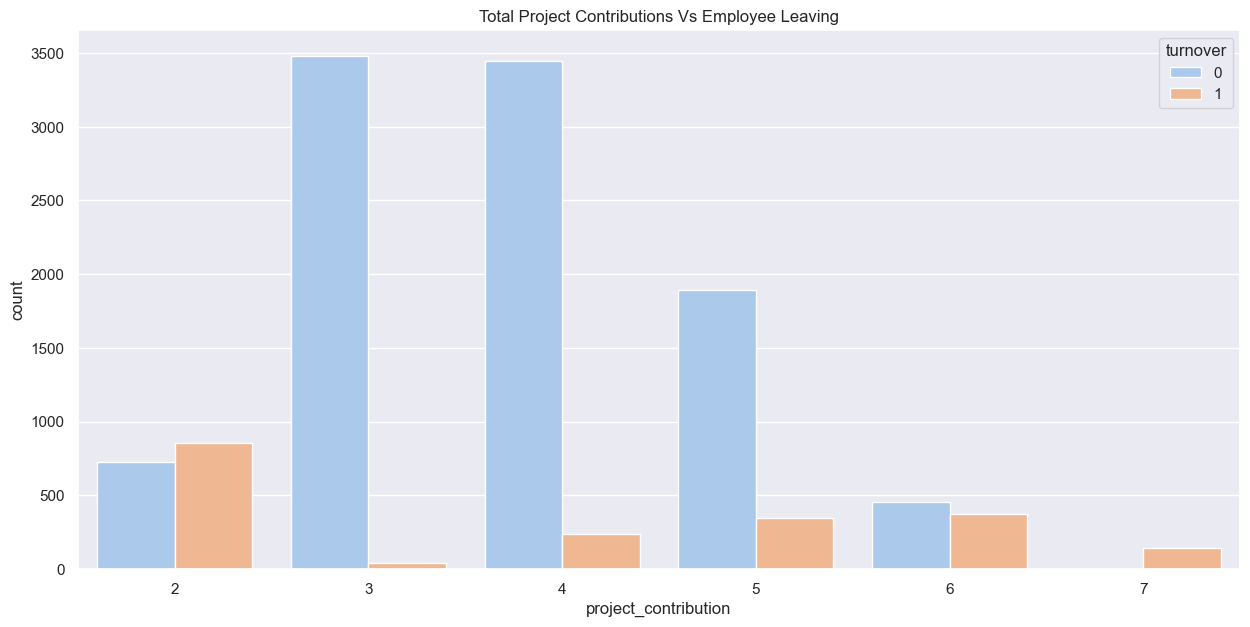

In [404]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15, 7))

data = df0.groupby(['project_contribution', 'turnover'])['project_contribution'].count().reset_index(name="count")

sns.barplot(data=data, x='project_contribution', y='count', hue='turnover').set(title="Total Project Contributions Vs Employee Leaving")

plt.show()



1. Employees who contribute to 2 projects have higher attrition.
2. There is a trend of increase in attrition over employees who contribute 4 or  more projects and then decreases.

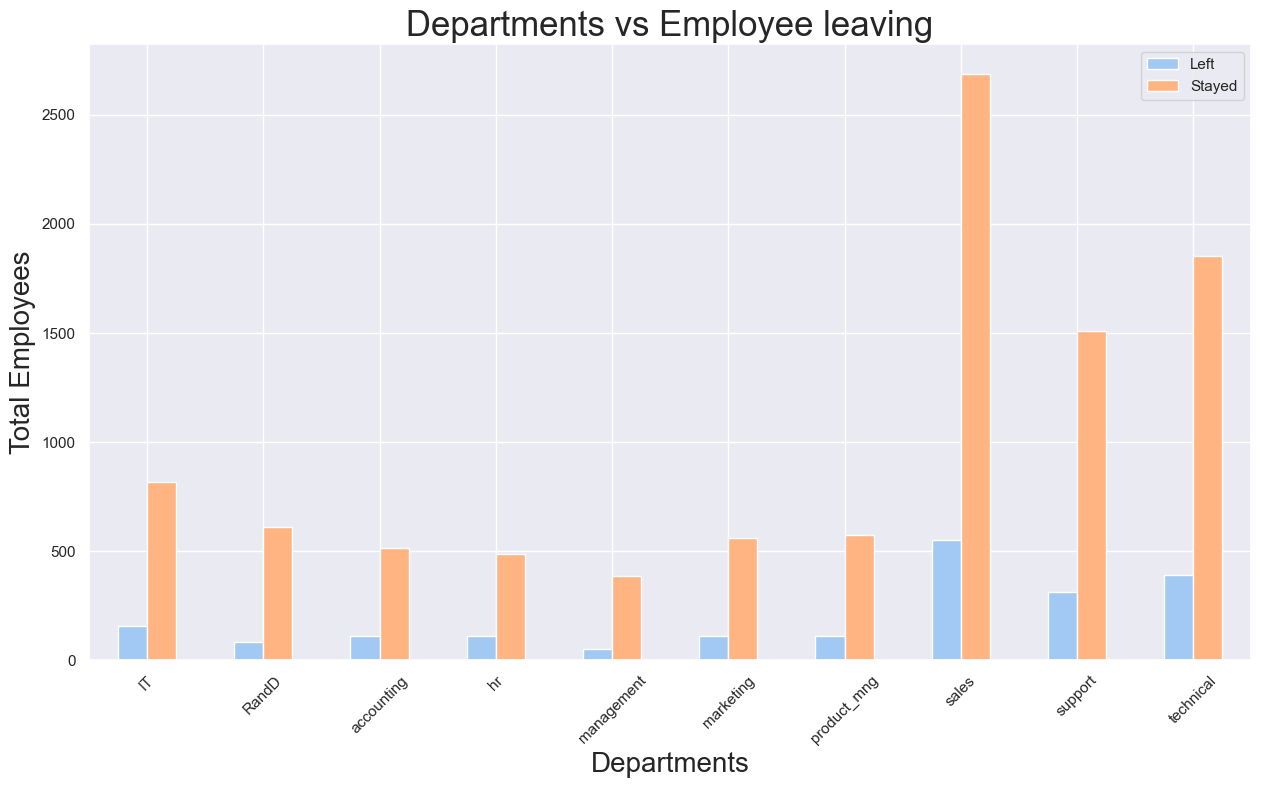

In [405]:
# Create a plot as needed
### YOUR CODE HERE ###
department_left = dict(df0.groupby(['department', 'turnover'])['department'].count().unstack(level=-1))
# sns.set(style = 'white')

# sns.barplot(df0, x)
left = list(department_left[1])
stayed = list(department_left[0])
department_names = list(department_left[0].index)

plotdata = pd.DataFrame({
    "Left" : left,
    "Stayed" : stayed},
    index = department_names
)

plt.rcParams['font.size'] = 15
plotdata.plot(kind="bar", figsize=(15,8))
plt.title("Departments vs Employee leaving", fontsize=25)
plt.xlabel("Departments", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Total Employees", fontsize=20)
plt.show()

Turnover's are higher in support, sales, technical roles, which is understandable with volume of employees in those department.

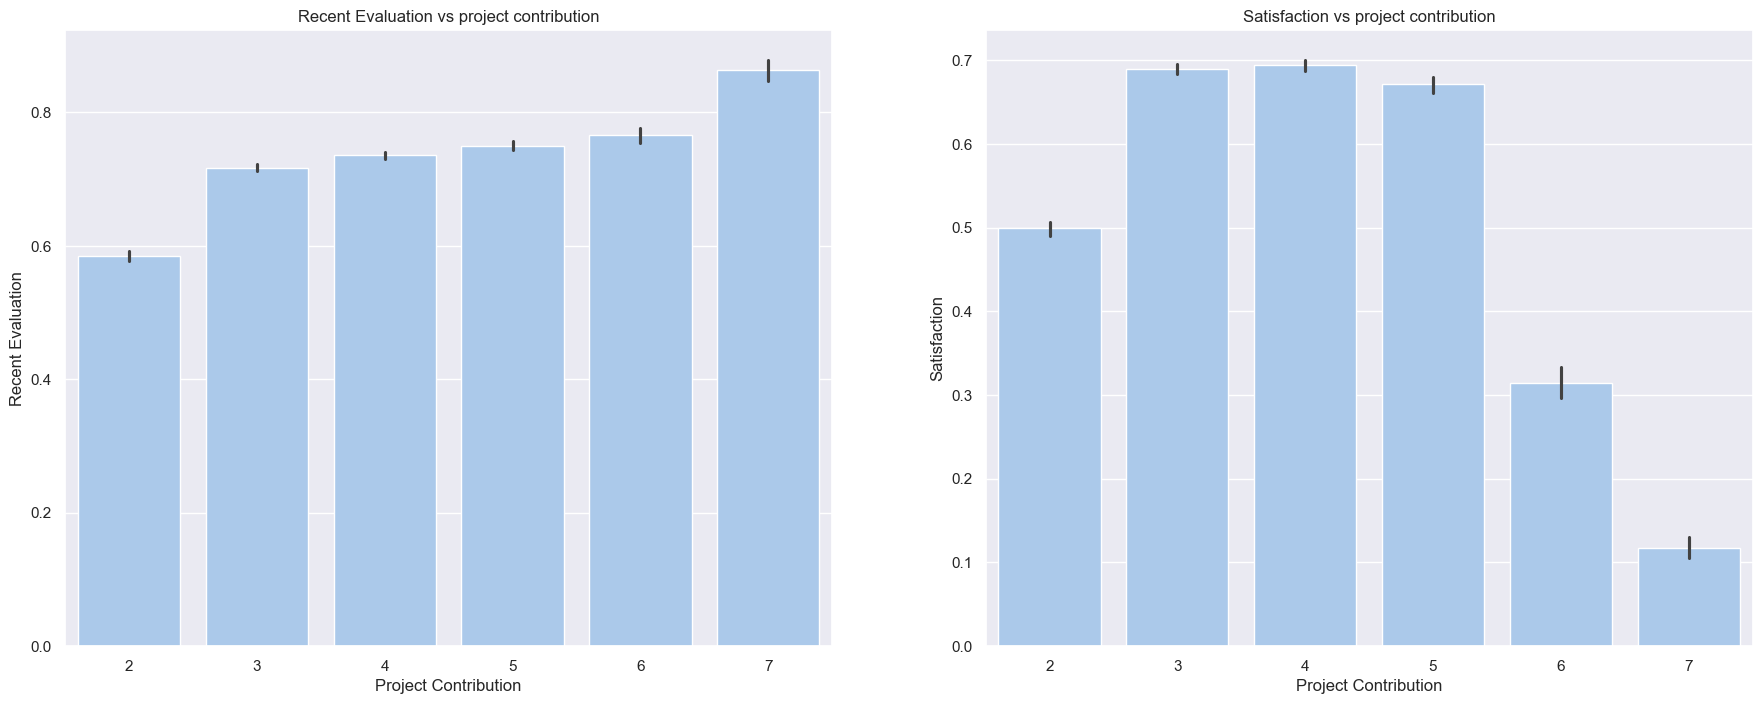

In [406]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2, figsize= (9, 8))
plt.subplots_adjust(right=2)
sns.barplot(data=df0, y='satisfaction', x='project_contribution', ax = ax[1]).set(title="Satisfaction vs project contribution", xlabel="Project Contribution", ylabel="Satisfaction")
sns.barplot(data=df0, y='recent_evaluation', x='project_contribution', ax = ax[0]).set(title="Recent Evaluation vs project contribution", xlabel="Project Contribution", ylabel="Recent Evaluation")
plt.show()

1. The Evaluation rating tends to be high for employee who contribute to more projects
2. The Satisfaction of Employee tends to be high when they are contributing to projects in range of 2 - 5 and decrease afterwards.

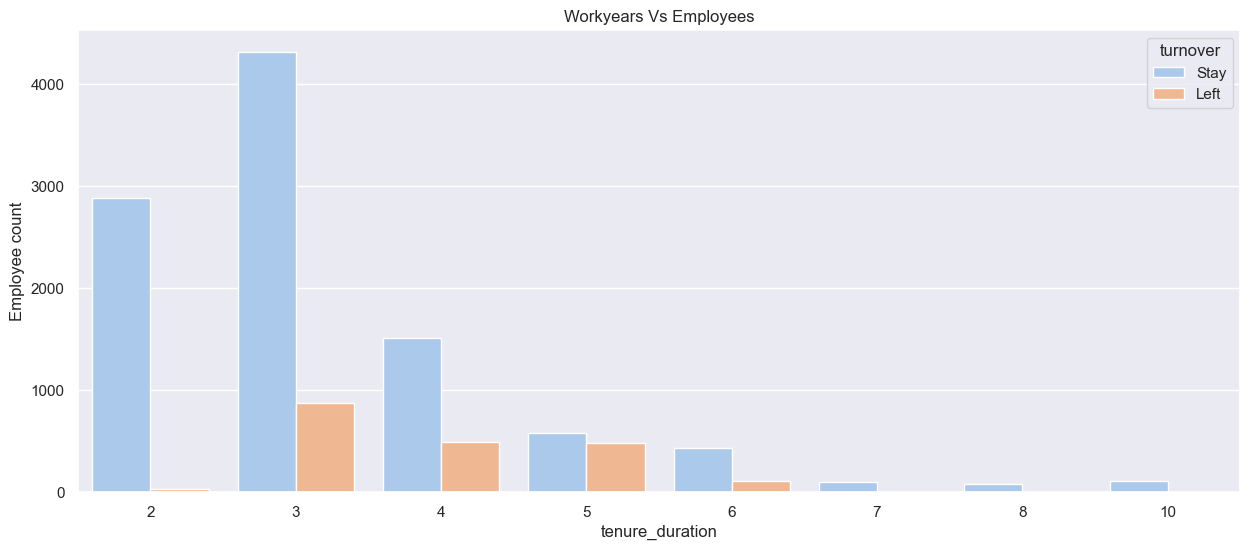

In [407]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(15,6))


data = df0.groupby(['tenure_duration', 'turnover'])['tenure_duration'].count().reset_index(name="count")
data['turnover'] = data['turnover'].apply(lambda x: 'Left' if x == 1 else 'Stay')

ax = sns.barplot(data=data,x='tenure_duration', y='count', hue='turnover').set(title = 'Workyears Vs Employees', ylabel='Employee count')
plt.show(ax)


1.  Employees with 2 years of work years don't tend to leave, while employees having 3, 4, 5 work years are the predominant          group who tend to leave.
2.  Employees who have spent 5 years in company show higher probability of leaving, as Stayed/left count looks nearly               identical.

<Figure size 1500x800 with 0 Axes>

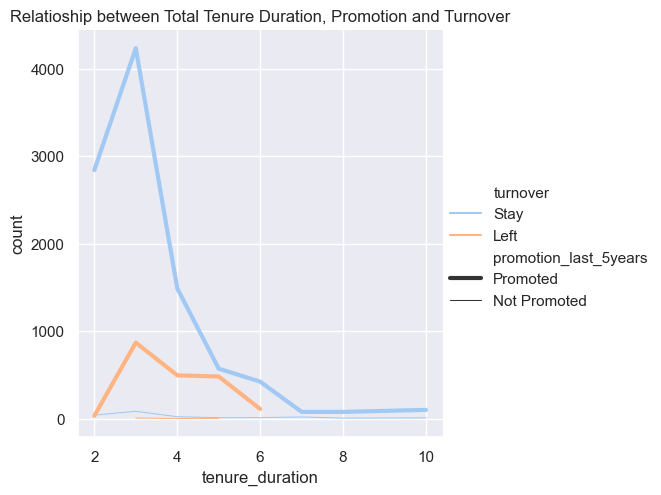

In [408]:
plt.figure(figsize=(15, 8))

data = df0.groupby(['tenure_duration', 'promotion_last_5years','turnover'])['satisfaction'].count().reset_index(name='count')
data['turnover'] = data['turnover'].apply(lambda x: 'Left' if x == 1 else 'Stay')
data['promotion_last_5years'] = data['promotion_last_5years'].apply(lambda x: 'Not Promoted' if x == 1 else 'Promoted')

sns.relplot(data=data, y='count', x='tenure_duration', size='promotion_last_5years', hue='turnover', kind='line').set(title="Relatioship between Total Tenure Duration, Promotion and Turnover")
# legend = plt.legend()
# legend.get_texts()[1].set_text("Stay")
# legend.get_texts()[2].set_text("Left")
# legend.get_texts()[4].set_text("(bold) Not promoted")
# legend.get_texts()[5].set_text("(Thin) Promoted")

plt.show()

There is a trend of employees who have tenure duration of 2 years to 6 years leaving company predominatly onces who don't get promotion.

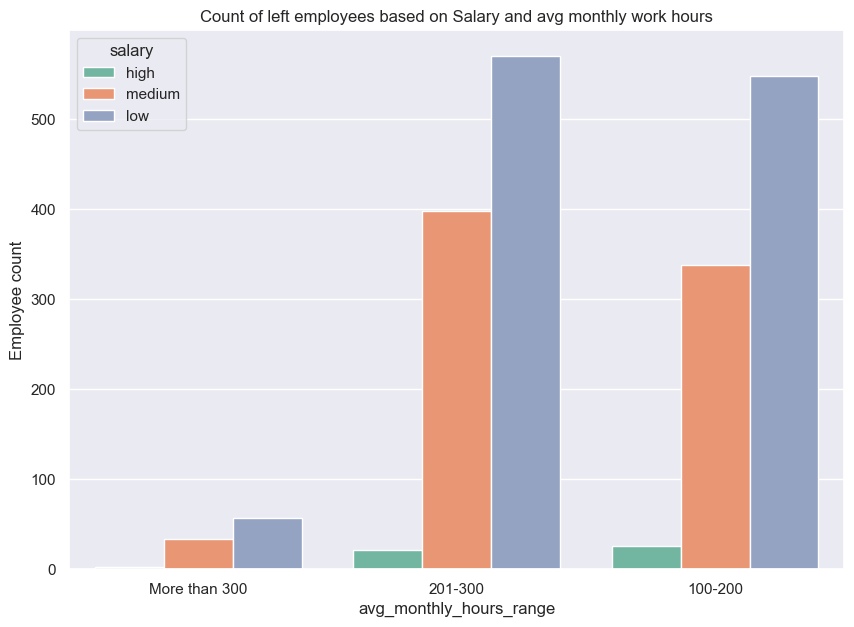

In [409]:
def catoHours(x):   
    if x < 100:
        return "Less than 100"
    elif x >= 100 and x <= 200:
        return "100-200"
    elif x > 200 and x <= 300:
        return "201-300"
    elif x > 300:
        return "More than 300"

df0['avg_monthly_hours_range'] = df0['monthly_hours_avg'].apply(catoHours)


data = df0.groupby(['avg_monthly_hours_range', 'salary', 'turnover'])['satisfaction'].count().reset_index(name='count')
data = data.sort_values(by=['turnover', 'count'])


plotdata = data[data['turnover'] == 1]
plt.figure(figsize=(10,7))
palette = sns.color_palette("Set2", 3)
sns.barplot(data = plotdata, x='avg_monthly_hours_range', y='count', hue='salary', palette=palette).set(title="Count of left employees based on Salary and avg monthly work hours", ylabel="Employee count")
plt.show()

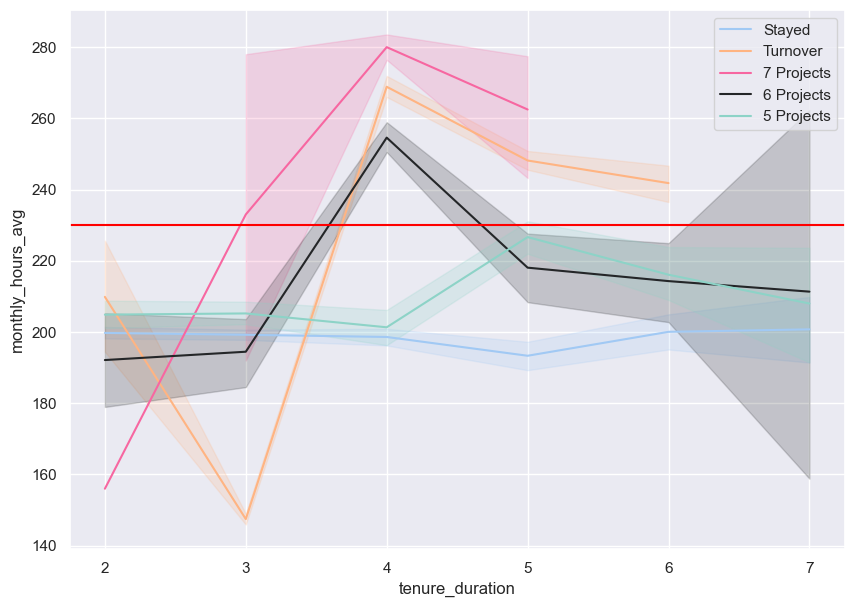

In [414]:
plt.figure(figsize=(10,7))

# sns.lineplot(data=df0, x=df0[df0['tenure_duration'] <= 7]['tenure_duration'], y='monthly_hours_avg', hue=df0['salary'])
# sns.lineplot(data=df0, x=df0[df0['tenure_duration'] <= 7]['tenure_duration'], y='monthly_hours_avg', hue=df0['promotion_last_5years'], errorbar=('ci', 0), palette=sns.color_palette('pastel6',2))

sns.set_theme(style='darkgrid',palette='pastel')

sns.lineplot(data=df0, x=df0[df0['tenure_duration'] <= 7]['tenure_duration'], y='monthly_hours_avg', hue=df0['turnover'])


ax = sns.lineplot(data=df0, x=df0[df0['tenure_duration'] <= 7]['tenure_duration'], y='monthly_hours_avg', hue=df0[df0['project_contribution'] == 7 ]['project_contribution'],  palette=sns.color_palette("RdPu", 1))
ax = sns.lineplot(data=df0, x=df0[df0['tenure_duration'] <= 7]['tenure_duration'], y='monthly_hours_avg', hue=df0[df0['project_contribution'] == 6 ]['project_contribution'],  palette=sns.dark_palette("#79C", 1))
ax = sns.lineplot(data=df0, x=df0[df0['tenure_duration'] <= 7]['tenure_duration'], y='monthly_hours_avg', hue=df0[df0['project_contribution'] == 5 ]['project_contribution'],  palette=sns.color_palette("Set3", 1))
legend = plt.legend()
legend.get_texts()[0].set_text("Stayed")
legend.get_texts()[1].set_text("Turnover")
legend.get_texts()[2].set_text("7 Projects")
legend.get_texts()[3].set_text("6 Projects")
legend.get_texts()[4].set_text("5 Projects")


ax.set(title='')

plt.axhline(y=230, color='red')
plt.show()

We can clearly see that employees in their 4th year, tend to contribute to more than 4 projects, overwork, and turnover

In [310]:
df0.promotion_last_5years.value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

Majority of the employees don't get promotions..

In [311]:
df0 = df0.drop(columns="avg_monthly_hours_range")

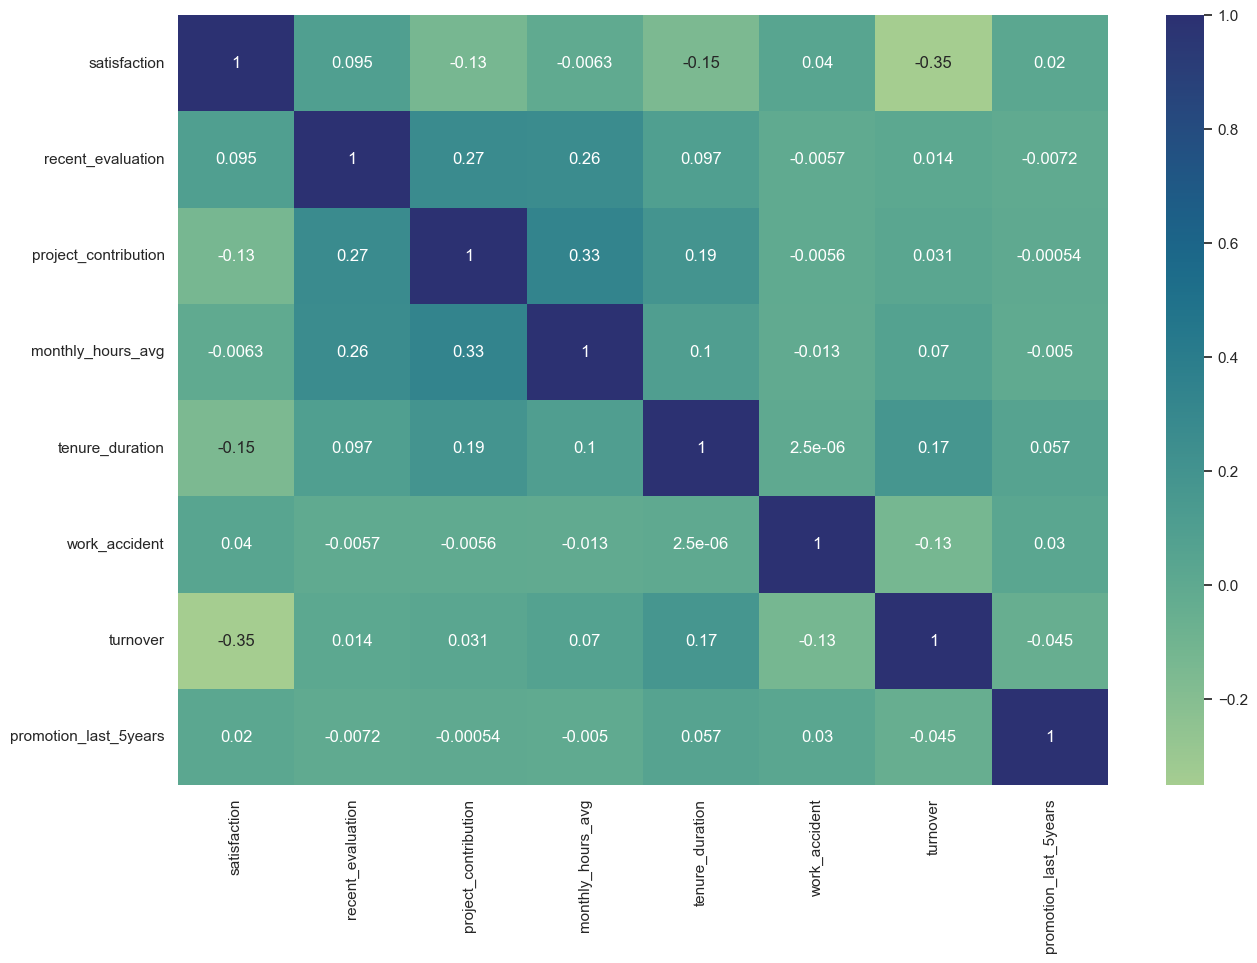

In [312]:
plt.figure(figsize=(15, 10))

sns.heatmap(
    df0.corr(numeric_only=True),
    annot=True,
    cmap="crest")

plt.show()

### Insights

1. The dependent variable class is imbalanced with 16.3% left(1) category and 83.3% stay(0) category, The one variable which has outliers are tenure durations, as there is few people who have high tenures.

2. The satisfaction variable has negative correlation with turnover at -0.35 infered from heatmap.

3. The employees who turnover have various factors affecting that decision, main factors are:
   
   a. The first type who have high evaluation rating, but their satisfaction < 0.1, we were able to               indentify           that these are 4th year tenure employees who have yet to get promotion and working beyond conventional hour                     works. Extreme work hours with no returns
   
   b. 3rd year tenure emloyees with low satisfaction and low evaluation group together, exactly once who are involed 2               projects. This needs further investigation. They work under the conventional hours.
   
   c. 5th and 6th year employees are prone to leave if they contribute to 4 or more projects, even if they have high                 satisfaction and evaluations
   
The main factor comes does to time and work load. There needs to be a cap on both.

4. There is two sets of employees who have really good evaluations, Both involes contributing to more number of projects
   
   a. One set, has high evalation rating, low satisfaction, this coincides with 3a.
   
   b. Second set, have high evaluation and high satifaction. this coincides with 3c.

The evaluation Rating framework must be reexamined.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





The outcome variable is categorical, we will go with classication, try Logistic Regression model

### Examine Correlations

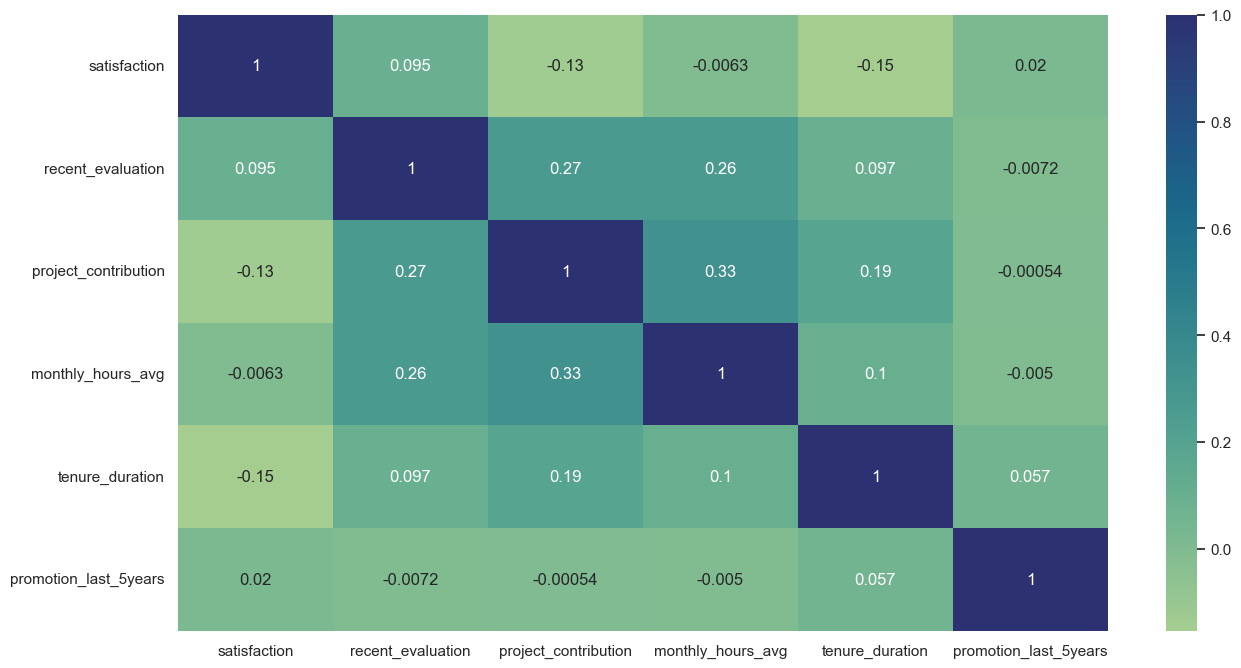

In [313]:
#Heatmap plot

plt.figure(figsize=(15, 8))

sns.heatmap(
    df0[["satisfaction", "recent_evaluation", "project_contribution", "monthly_hours_avg", "tenure_duration", "promotion_last_5years"]].corr(),
    annot=True,
    cmap="crest")

plt.show()

There is no severe multicollinearity amoung the features.

### Satisafaction is the only variable with high negative correlation with dependent variable turnover. The two most influencing factors of satisfactions are time and work load. But, I will avoid time variable to avoid scaling issue.

In [314]:
X = df0[['satisfaction']]

y = df0[['turnover']]

In [315]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [316]:
clf = LogisticRegression().fit(X_train, y_train)

c:\Users\copyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [317]:
clf.coef_

array([[-3.69507177]])

One unit increase in satisfaction rating is equal to -3.69 Increase in odds the employee leaving

In [318]:
clf.intercept_

array([0.45986702])

In [319]:
y_pred = clf.predict(X_test)

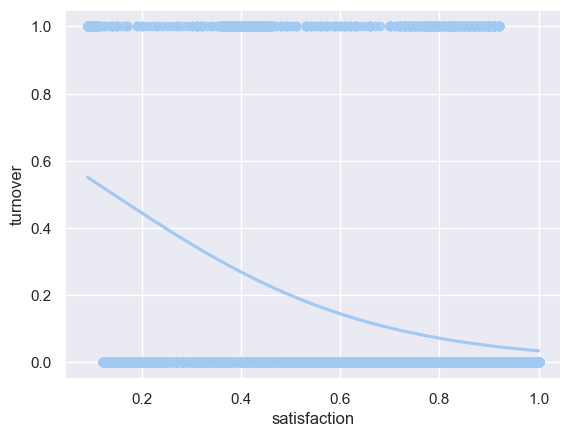

In [320]:
#Regression plot
sns.regplot(data=df0, x='satisfaction', y='turnover', logistic=True,ci=None)
plt.show()

There is negative correlation between turnover and satisfaction. i.e as satisfaction increases, turn over tends to decreases.

In [321]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.877449
Precision: 0.964286
Recall: 0.271357
F1 Score: 0.423529


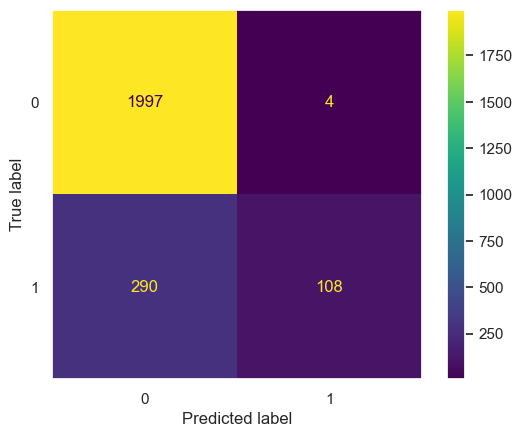

In [322]:

cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot(values_format='')
plt.grid(False)
plt.show()

True positives = 371, True Negatives = 1982, False Positives = 19, False Negatives = 27

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. work_accident has negative correlation with turnover, that's odd!!
   With the exception of satisfaction rating, which exhibited a negative correlation with turnover,      other variables demonstrated a positive correlation.

2. The independent variable that I selected was "satisfaction". By utilising data visualisation, we      were able to discern a pattern in turnover across various satisfaction levels and with          heatmap plot we found it had high negative correlation with turnover.

3. Indeed, the selected independent variable satisfied every supposition. There was an absence of        multicollinearity and extreme anomalies, and the dependent variable exhibited a negative              correlation. In terms of sample size, 16.6% left (1) while 83.4% stayed(0).

4. With 96% precision, the logistics regression model was capable of making predictions. The extremely    low recall value, however, indicates that there is room for improvement, as both recall and            precision are essential and focus should be on harmony between them.

5. Yes, it is possible to enhance the model by incorporating tenure_duration, salary, and                monthly_hours_avg; however, in order to proceed, these variables must be scaled and encoded.

6. [plotly](https://plotly.com/python/plotly-express/) \
   [Internation Labour Organistaion](https://www.ilo.org/global/standards/subjects-covered-by-international-labour-standards/working-time/lang--en/index.htm)

7. monthly_hours_avg have various points at which employees turnover, those point could end up exploited. To avoid that, we will only consider conventional hours and rest as Unconventional Hours. while not going into particulars on at which hour a employee tends to turnover.

In [323]:
df0 = df0.drop(columns=['work_accident'])

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Classifications types

### Identify the types of models most appropriate for this task.

DecisionTree, RandandForest,  XgbClassifier

### Modeling

Add as many cells as you need to conduct the modeling process.

In [324]:
df0['UnconventionalWorkHours'] = df0['monthly_hours_avg'].apply(lambda x: 1 if x > 192 else 0)
df0 = df0.drop(columns=['monthly_hours_avg'])

In [325]:
### YOUR CODE HERE ###
order = pd.Categorical(df0['salary'], categories=['low', 'medium', 'high'], ordered=True)
order

labels, unique = pd.factorize(order, sort=True)

df0['salary'] = labels

df0['salary']

0        0
1        1
2        1
3        0
4        0
        ..
11995    2
11996    2
11997    2
11998    2
11999    0
Name: salary, Length: 11991, dtype: int64

In [326]:
df0 = pd.get_dummies(df0, columns=['department'], drop_first=False, dtype=int)
df0

satisfaction  recent_evaluation  project_contribution  tenure_duration  \
0              0.38               0.53                     2                3   
1              0.80               0.86                     5                6   
2              0.11               0.88                     7                4   
3              0.72               0.87                     5                5   
4              0.37               0.52                     2                3   
...             ...                ...                   ...              ...   
11995          0.90               0.55                     3               10   
11996          0.74               0.95                     5               10   
11997          0.85               0.54                     3               10   
11998          0.33               0.65                     3               10   
11999          0.50               0.73                     4                3   

       turnover  promotion_last_5years  salary  UnconventionalWorkHours  \
0             1                      0       0                        0   
1             1                      0       1                        1   
2             1                      0       1                        1   
3             1                      0       0                        1   
4             1                      0       0                        0   
...         ...                    ...     ...                      ...   
11995         0                      1       2                        1   
11996         0                      1       2                        1   
11997         0                      1       2                        0   
11998         0                      1       2                        0   
11999         0                      0       0                        0   

       department_IT  department_RandD  department_accounting  department_hr  \
0                  0                 0                      0              0   
1                  0                 0                      0              0   
2                  0                 0                      0              0   
3                  0                 0                      0              0   
4                  0                 0                      0              0   
...              ...               ...                    ...            ...   
11995              0                 0                      0              0   
11996              0                 0                      0              0   
11997              0                 0                      0              0   
11998              0                 0                      0              0   
11999              1                 0                      0              0   

       department_management  department_marketing  department_product_mng  \
0                          0                     0                       0   
1                          0                     0                       0   
2                          0                     0                       0   
3                          0                     0                       0   
4                          0                     0                       0   
...                      ...                   ...                     ...   
11995                      1                     0                       0   
11996                      1                     0                       0   
11997                      1                     0                       0   
11998                      0                     1                       0   
11999                      0                     0                       0   

       department_sales  department_support  department_technical  
0                     1                   0                     0  
1                     1                   0                     0  
2                     1        

In [327]:
X = df0.drop(columns=['turnover'])
Y = np.ravel(df0[['turnover']])
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [328]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [329]:
x_tr, x_valid, y_tr, y_valid = train_test_split(x_train, y_train, test_size = 0.2, stratify=y_train, random_state=42)

## DecisionTreeClassifier

In [330]:
dtc = DecisionTreeClassifier(random_state=0)

### Hypertuning parameters

In [331]:
cv_params = {
    'max_depth': [2, 4, None],
    'min_samples_split': [2, 5, 6],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

scoring = [
    'f1',
    'precision',
    'recall',
    'accuracy'
]

In [332]:
dclf = GridSearchCV(
    dtc,
    param_grid=cv_params,
    scoring=scoring,
    cv=5,
    refit='f1'
)

In [333]:
dclf.fit(x_tr, y_tr)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, None],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 6]},
             refit='f1', scoring=['f1', 'precision', 'recall', 'accuracy'])

In [334]:
print(f"Best validation score : {round(dclf.best_score_,4)}")

Best validation score : 0.9225


In [335]:
dclf.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [336]:
y_pred_dclf = dclf.predict(x_test)

In [337]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_dclf))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_dclf))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_dclf))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_dclf))

Accuracy: 0.975823
Precision: 0.938144
Recall: 0.914573
F1 Score: 0.926209


## RandomForestClassifier

In [338]:
rfc = RandomForestClassifier(random_state=0)

In [339]:
cv_params = {
    'n_estimators': [300,500],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt', 'log2', None],
}

scoring = [
    'f1',
    'precision',
    'recall',
    'accuracy'
]

In [340]:
rclf = GridSearchCV(
    rfc,
    param_grid=cv_params,
    scoring=scoring,
    cv=5,
    refit='f1',
    error_score='raise'
)

In [341]:
%%time

rclf.fit(x_tr, y_tr)

CPU times: total: 30 s
Wall time: 30.9 s


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [300, 500]},
             refit='f1', scoring=['f1', 'precision', 'recall', 'accuracy'])

In [342]:
rclf.best_params_

{'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [343]:
rclf.best_score_

0.8736134340005615

In [344]:
y_pred_rclf = rclf.predict(x_test)

In [345]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred_rclf))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred_rclf))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred_rclf))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred_rclf))

Accuracy: 0.962901
Precision: 0.865248
Recall: 0.919598
F1 Score: 0.891596


### XgboostClassifier

In [346]:
xbgc = XGBClassifier(objective='binary:logistic')

In [347]:
cv_params = {
    'n_estimators': [300, 400, 500],
    'max_depth': [1, 2, 3],
    'min_child_weight': [0.5, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'subsample': [0.6, 0.7, 0.8]
    
}
scoring = [
    'f1',
    'precision',
    'recall',
    'accuracy'
]

In [348]:
xclf = GridSearchCV(
    xbgc,
    param_grid=cv_params,
    scoring=scoring,
    cv=5,
    refit='f1'
)

In [349]:
%%time

xclf.fit(x_tr, y_tr)

CPU times: total: 28min 39s
Wall time: 5min 45s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [1, 2, 3], 'min_child_weight': [0.5, 1.0],
                         'n_estimators': [300, 400, 500],
                         'subsample': [0.6, 0.7, 0.8]},
             refit='f1', scoring=['f1', 'precision', 'recall', 'accuracy'])

In [350]:
xclf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 0.5,
 'n_estimators': 300,
 'subsample': 0.8}

In [351]:
xclf.best_score_

0.9396899413957641

In [352]:
y_pred = xclf.predict(x_test)

In [353]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.978741
Precision: 0.946015
Recall: 0.924623
F1 Score: 0.935197


### Try to run the bellow cells with causation, it was moved here from above. used as surrogate to understand best_params_ from RandomForest (Global Surrogate Method)

In [354]:
# dtc = DecisionTreeClassifier(max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=0)

In [355]:
# {'max_depth': 3,
#  'max_features': None,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 300}

In [356]:
# dtc.fit(x_tr, y_tr)

In [357]:
# pred = dtc.predict(x_valid)

In [358]:
# print("Accuracy:", "%.6f" % metrics.accuracy_score(y_valid, pred))
# print("Precision:", "%.6f" % metrics.precision_score(y_valid, pred))
# print("Recall:", "%.6f" % metrics.recall_score(y_valid, pred))
# print("F1 Score:", "%.6f" % metrics.f1_score(y_valid, pred))

In [359]:
# plt.figure(figsize=(15,8))
# plot_tree(dtc, max_depth=2, fontsize=14, feature_names = x.columns)
# plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [373]:
# Result Table
class results:
    
    def __init__(self):
        self.table = pd.DataFrame(columns=['Model', 'F1', 'Recall',  'Precision',  'Accuracy'])

    def make_results(self,model_name, model_object, score_name, i):
    
        dataf = pd.DataFrame(model_object.cv_results_)
    
        temp = dataf.loc[dataf[score_name].idxmax(), :]

        self.table.loc[i, 'Model'] = model_name
        self.table.loc[i, 'F1'] = temp.mean_test_f1
        self.table.loc[i, 'Recall'] = temp.mean_test_recall
        self.table.loc[i, 'Precision'] = temp.mean_test_precision
        self.table.loc[i, 'Accuracy'] =temp.mean_test_accuracy
        return self.table

## DesisionTree Classifier


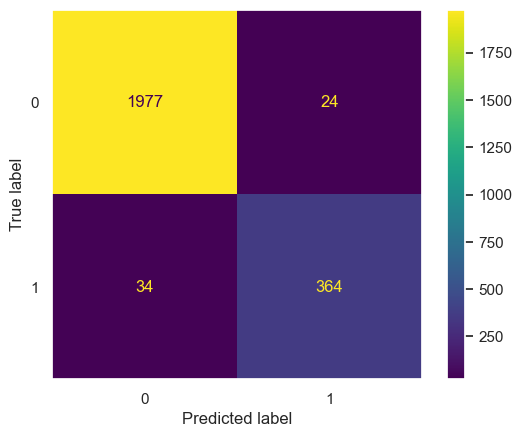

In [360]:
cm = metrics.confusion_matrix(y_test, y_pred_dclf, labels = dclf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = dclf.classes_)
disp.plot(values_format='')
plt.grid(False)
plt.show()

True positives = 364, True Negatives = 1977, False Positives = 24, False Negatives = 34

### ROC Metrics

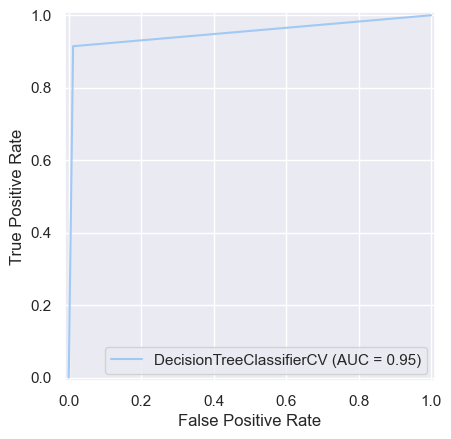

In [362]:

fpr, tpr, _ = roc_curve(y_test, y_pred_dclf, pos_label=dclf.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="DecisionTreeClassifierCV")

roc_display.plot()

plt.show()

A 95 AUC Score indicates, The Models Predictions are 95% Correct.

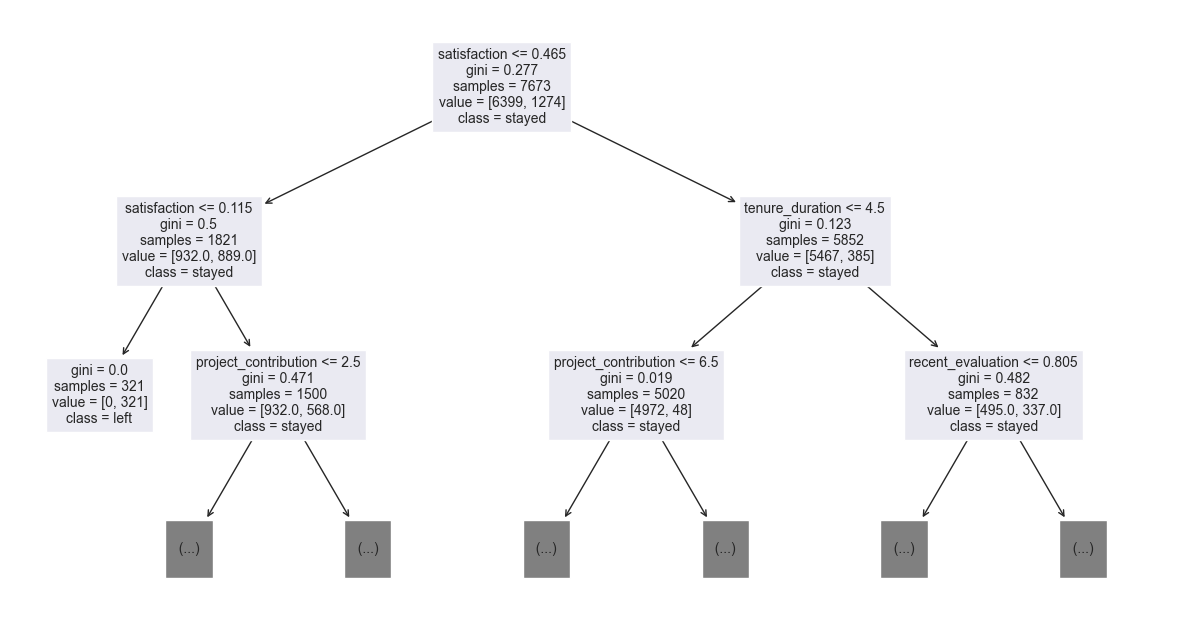

In [363]:
plt.figure(figsize=(15,8))
plot_tree(dclf.best_estimator_, max_depth=2, fontsize=10, feature_names = X.columns, class_names={0: 'stayed', 1: 'left'})
plt.show()

### Important features in the model

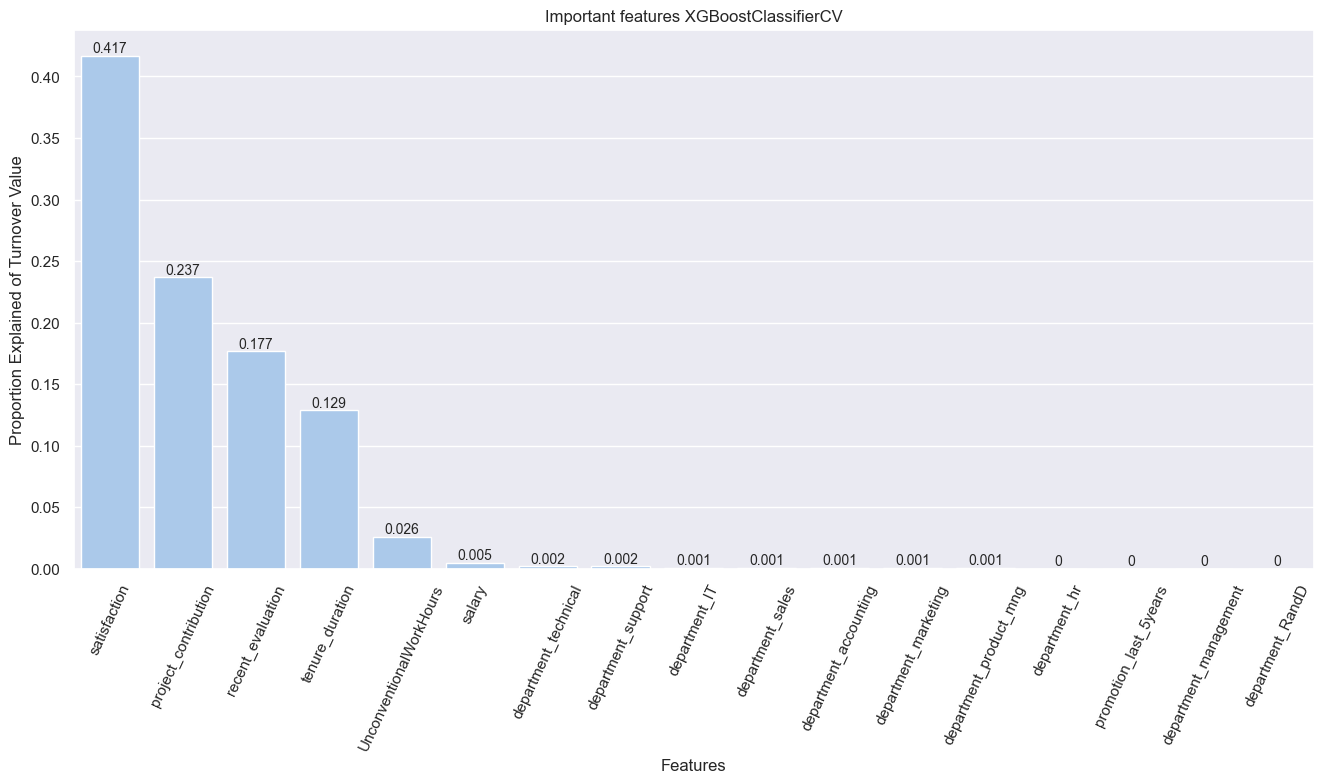

In [364]:
importances = dclf.best_estimator_.feature_importances_

imp = pd.Series(importances, index=X.columns).sort_values(ascending=False).reset_index()

imp

imp[0] = imp[0].apply(lambda x: round(x,3))

plt.figure(figsize=(16, 7))

ax = sns.barplot(data=imp, x='index', y=0)
ax.set(title='Important features XGBoostClassifierCV',  ylabel='Proportion Explained of Turnover Value', xlabel='Features')

plt.xticks(rotation=65)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [375]:
dres = results()
dres.make_results("DecisionTreeClassifierCV", dclf, "mean_test_f1", 0)

Model        F1    Recall Precision  Accuracy
0  DecisionTreeClassifierCV  0.922477  0.901118  0.945348  0.974848

Decision Tree Model has performed well, with Accuracy of 97.4% and F1 of 92.2%
This is a good start for us, The Important features also resemble the features we studied in EDA. But, Decision Trees are prone to overfitting and to make sure our model is stable. We will built ensemble models and choose the best one.

## RandomForest Classifier


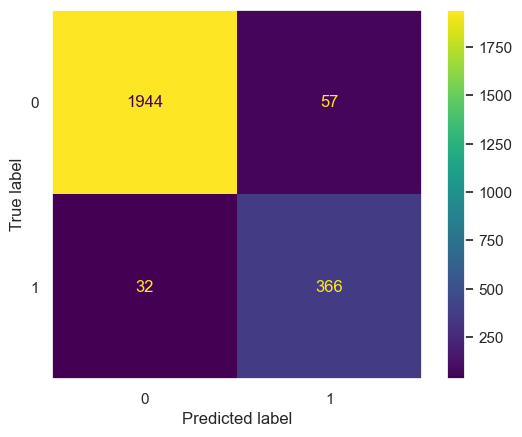

In [365]:
cm = metrics.confusion_matrix(y_test, y_pred_rclf, labels = rclf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rclf.classes_)
disp.plot(values_format='')
plt.grid(False)
plt.show()

True positives = 366, True Negatives = 1944, False Positives = 57, False Negatives = 32

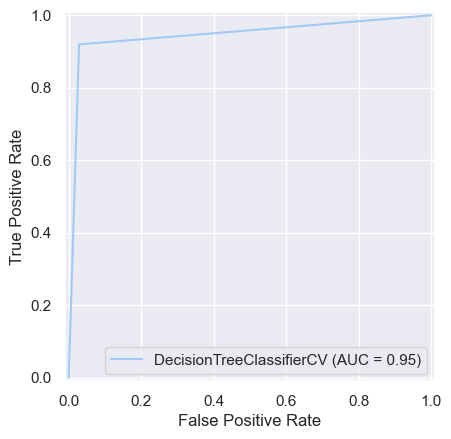

In [366]:
fpr, tpr, _ = roc_curve(y_test, y_pred_rclf, pos_label=rclf.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="DecisionTreeClassifierCV")

roc_display.plot()

plt.show()

A 95 AUC Score indicates, The Models Predictions are 95% Correct.

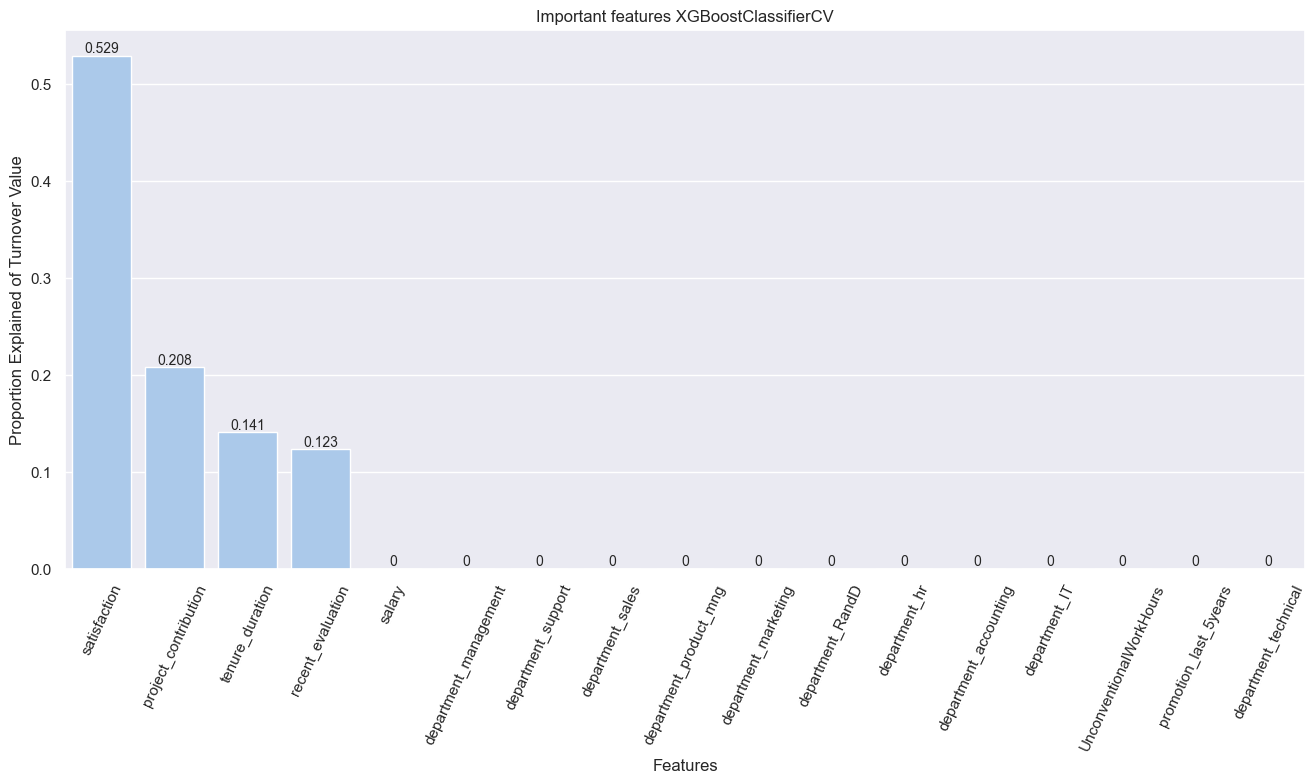

In [367]:
importances = rclf.best_estimator_.feature_importances_

imp = pd.Series(importances, index=X.columns).sort_values(ascending=False).reset_index()

imp

imp[0] = imp[0].apply(lambda x: round(x,3))

plt.figure(figsize=(16, 7))

ax = sns.barplot(data=imp, x='index', y=0)
ax.set(title='Important features XGBoostClassifierCV',  ylabel='Proportion Explained of Turnover Value', xlabel='Features')

plt.xticks(rotation=65)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [377]:
rclf.best_params_

{'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [376]:
rres = results()
rres.make_results("RandomForestClassifierCV", rclf, "mean_test_f1", 1)

Model        F1   Recall Precision  Accuracy
1  RandomForestClassifierCV  0.873613  0.91602  0.835086  0.955949

The RandomForestClassifierCV has performed well with precision score 83.5% and recall score 91.6% the harmony between these two score can be seen in F1 score 87.3%. I don't think the model has captured all the important features and the unconventional work hours feature that Decision Tree stated as important is not see here. There is a disparity seen here, even though the model was trained with higher estimators and low max_depth.

What does a precision of 83.7% mean to the company? 

Precision = TP / TP + FP 

False positive - It's predicting a employee is going to quit, while he's not going to

precision, conveys the proportion of employees who are actually going to quit out of all the employees that have been predicted to quit.


What does a recall of 91.2% mean to the company?

Recall = TP / TP + FN

FN - It's predicting a employee is not going to quit, while he's going to 

Recall, conveys the proportion of employees who's goint to quit that the classifier correctly identified. 

We need to find a harmony between both precision and recall, For that reason we are using F1 score which seeks harmony between the both through penalsing the other.

But, RandomForestClassifier doesn't satisfy our needs and has not fully captured what's happening, as EDA clearly showed us there is a correlation between work hours and turnover. So, I'm goint to built a xgboost classifier with high estimators to make sure there is no over dependency on any partivular feature and all are given equal representation.

## Xgboost Classifier

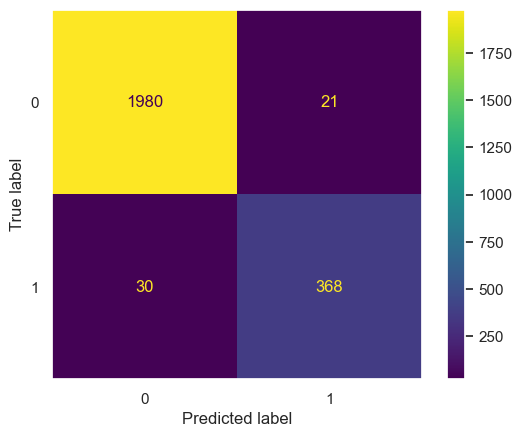

In [368]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot(values_format='')
plt.grid(False)
plt.show()

True positives = 368, True Negatives = 1980, False Positives = 21, False Negatives = 30

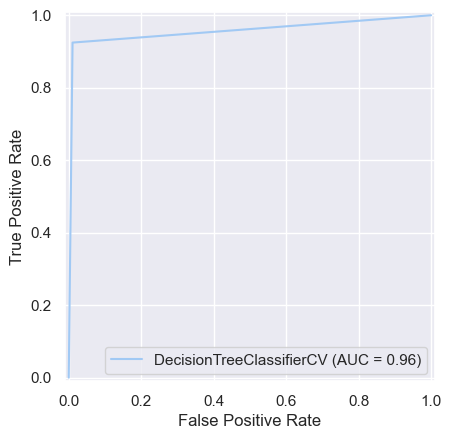

In [369]:
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=clf.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="DecisionTreeClassifierCV")

roc_display.plot()

plt.show()

A 96 AUC Score indicates, The Models Predictions are 96% Correct.

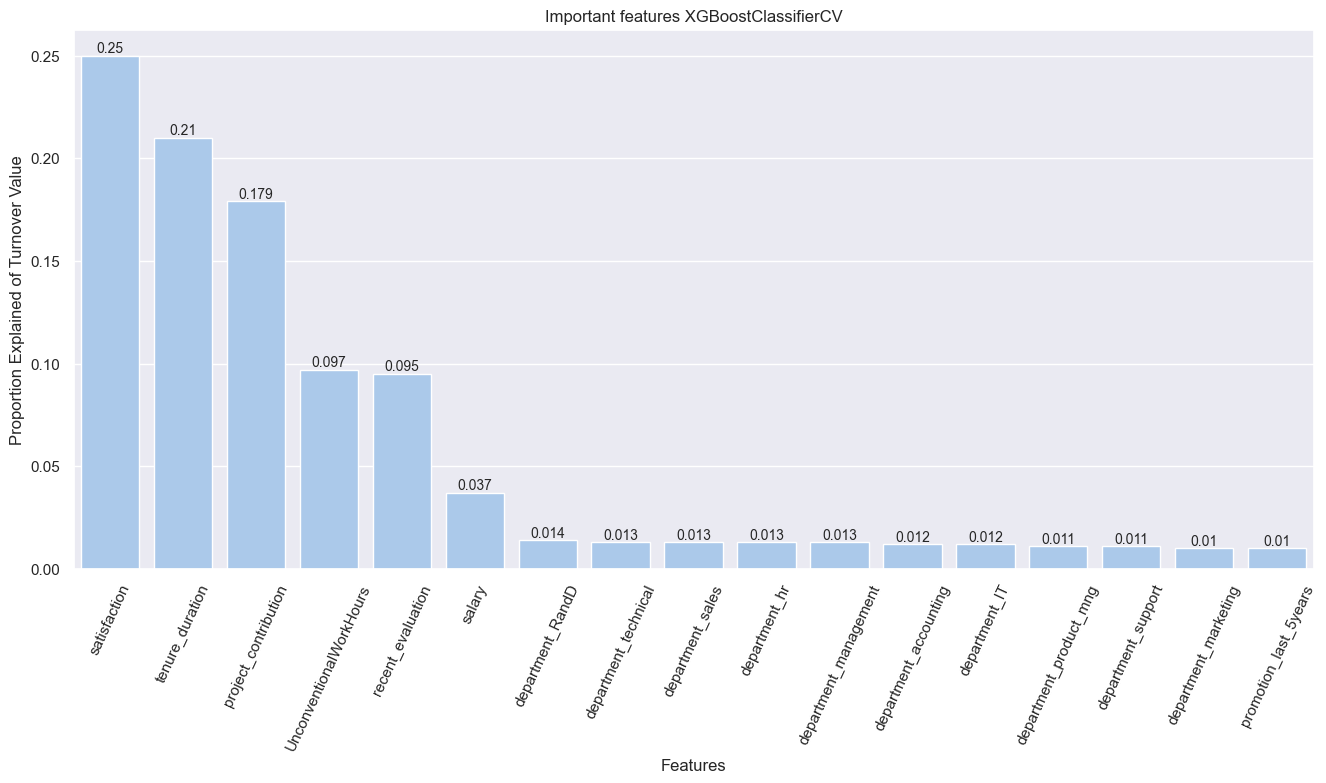

In [370]:
importances = xclf.best_estimator_.feature_importances_

imp = pd.Series(importances, index=X.columns).sort_values(ascending=False).reset_index()

imp

imp[0] = imp[0].apply(lambda x: round(x,3))

plt.figure(figsize=(16, 7))

ax = sns.barplot(data=imp, x='index', y=0)
ax.set(title='Important features XGBoostClassifierCV',  ylabel='Proportion Explained of Turnover Value', xlabel='Features')

plt.xticks(rotation=65)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [378]:
xres = results()

xres.make_results("XgboostClassiferCV", xclf, "mean_test_f1", 3)

Model       F1    Recall Precision  Accuracy
3  XgboostClassiferCV  0.93969  0.917585  0.962919  0.980451

Interesting, Tenure duration, project_contribution and satisfaction have similar proportion of Importance and Unconventional Work Hours has also been represented, That acutally is a good take on this problem, As we have seen through EDA that all the above features does play a important role.


As we have disscused earlier, we will be taking f1 score as our main metric to evaluate the model performance, in short to find a harmony between precision and Recall.

What does a precision of 96.2% mean to the company? 

Precision = TP / TP + FP 

False positive - It's predicting a employee is going to quit, while he's not going to

precision, conveys the proportion of employees who are actually going to quit out of all the employees that have been predicted to quit.


What does a recall of 91.7% mean to the company?

Recall = TP / TP + FN

FN - It's predicting a employee is not going to quit, while he's going to 

Recall, conveys the proportion of employees who's goint to quit that the classifier correctly identified. 

From the above results, it's clear that Xgboost has the highest performing f1 score.
we(me) trained the xgboost with high estimators with low learning rate and tuned other hyperparameters to make sure the model robust to noise, overfitting and the Important Features has more spread.

### Xgboost parameters

In [371]:
xclf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 0.5,
 'n_estimators': 300,
 'subsample': 0.8}

### Summary of model results

In [372]:

re = results()

re.make_results("DecisionTreeClassifierCV", dclf, "mean_test_f1", 0)
re.make_results("RandomForestClassifierCV", rclf, "mean_test_f1", 1)
re.make_results("XgboostClassiferCV", xclf, "mean_test_f1", 3)

Model        F1    Recall Precision  Accuracy
0  DecisionTreeClassifierCV  0.922477  0.901118  0.945348  0.974848
1  RandomForestClassifierCV  0.873613   0.91602  0.835086  0.955949
3        XgboostClassiferCV   0.93969  0.917585  0.962919  0.980451

1. The key Influencer is satisfaction variable for logistic, DesicionTree, RandomForest, with a coeffient of -3.6 (one unit increase in satisfaction variable leads to -3.6 increase in probabilty of an Employee choosin got turnover), The other variables are project contribution, tenure_duration, evaluation rating. For Xgboost, the key influencer was tenure_duration, project_contribution, Unconventional work hours and the intution behind that needs further analysis, as of now we know that there is trend of turnover from year 3 to 6 and the factors affecting those were high projects and high work hours.

2. Focus on satisfaction level of emplyees, while there is also a need for capping on project contribution and work hours.

3. Keep an eye out for monthly work hours on avg of the employee, make sure it doesn't exceed conventional hours, project contribution should be capped, and evaluation metric should incentiviz quality over quantity of project  contribution. 

4. Yes, The Models can be further tweaked with hyperparameters, and feature engineering, like creating features like unconventional overs or exeed project cap. This way we can make the model more specific.

5. I've Sklearn and xgboost for parameter tuning.

6. For Ethical considerations, I've not decoded details on workhours, which has show key points at which a employee leave, as this could be exploited.

### Conclusion, Recommendations, Next Steps
Conclusion : The management should keep the satisafaction level as a overall metric for turnover,
and keep in mind that the main influencing factors are tenure duration, project contribution, work hours.

Putting cap on workhours to Conventional Hours, a cap on project contribution less than 4 projects, while focusing evaluation metric on quality of each project contribution. And initiating career development programs, incentivsing tenured employees will help reduce turnover and improve satisfaction levels


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.